[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


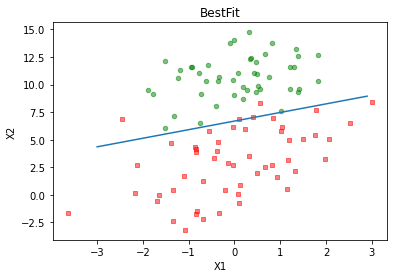

In [5]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet():
    dataMat = []                                                        #创建数据列表
    labelMat = []                                                        #创建标签列表
    fr = open('G:\\testSet.txt')                                            #打开文件   
    for line in fr.readlines():                                            #逐行读取
        lineArr = line.strip().split()                                    #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])        #添加数据
        labelMat.append(int(lineArr[2]))                                #添加标签
    fr.close()                                                            #关闭文件
    return dataMat, labelMat                                            #返回



def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))


def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                        #转换成numpy的mat
    labelMat = np.mat(classLabels).transpose()                            #转换成numpy的mat,并进行转置
    m, n = np.shape(dataMatrix)                                            #返回dataMatrix的大小。m为行数,n为列数。
    alpha = 0.001                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                        #最大迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                                #梯度上升矢量化公式
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()                                                #将矩阵转换为数组，返回权重数组


def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                            #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                            #数据个数
    xcord1 = []; ycord1 = []                                            #正样本
    xcord2 = []; ycord2 = []                                            #负样本
    for i in range(n):                                                    #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])    #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])    #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)#绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)            #绘制负样本
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.title('BestFit')                                                #绘制title
    plt.xlabel('X1'); plt.ylabel('X2')                                    #绘制label
    plt.show()       

if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()
    weights = gradAscent(dataMat, labelMat)
    print(weights)
    plotBestFit(weights)

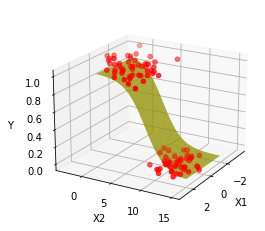

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
 
ax = plt.subplot(projection = '3d')
ax.set_xlabel('X1')  # 设置x坐标轴
ax.set_ylabel('X2')  # 设置y坐标轴
ax.set_zlabel('Y')  # 设置z坐标轴

#曲面 
weights= np.array([ 4.12414349,0.48007329,-0.6168482 ])
x1, x2 = np.meshgrid(np.arange(-2, 2,0.1),
                   np.arange(0, 15,0.1))
z=x1*weights[1]+x2*weights[2]+weights[0]
y=1/(1+np.exp(-1*z))
ax.plot_surface(x1,x2,y,color='y') 
ax.view_init(20,30)  #旋转视角

#散点
x1 = []                                                        
x2 = []   
y=[]                                                           
fr = open('G:\\testSet.txt')                                               
for line in fr.readlines():                                            
    lineArr = line.strip().split()                                    
    x1.append(float(lineArr[0]))
    x2.append(float(lineArr[1]))
    y.append(int(lineArr[2]))                               
fr.close()             

ax.scatter(x1, x2, y,color='r') 
plt.show()